In [50]:
from sympy import *
import numpy as np

g, r, w, m, h = symbols('g r w m h')

h1 = np.array([1.689, 1.658, 1.547, 1.452, 1.343, 1.243])  #em metros
w1 = np.array([56, 55, 53, 52, 50, 48])*np.pi/30. #em rpm, converte pra rad/s
h2 = np.array([1.634, 1.557, 1.411, 1.325, 1.231, 1.123])  #em metros
w2 = np.array([70, 69, 67, 65, 63, 61])*np.pi/30. #em rpm, converte pra rad/s

m = np.array([0.1148, 0.194])  # kg
g = 9.8     # m/s²
r = 0.357   # em metros
I = np.zeros(len(m))

B = np.array([1/h1, 1/h2])
C = np.array([1/w1**2, 1/w2**2])

In [51]:
from scipy import optimize

def test_func(B, a):
    return a*B

params, params_covariance = optimize.curve_fit(test_func, B[0], C[0])

I[0] = 2*m[0]*g*params[0] - m[0]*r**2
print(params, I[0])
# De acordo com a curva de ajuste, os parametros da equacao de movimento são determinados:

[0.04935977] 0.09643228620590015


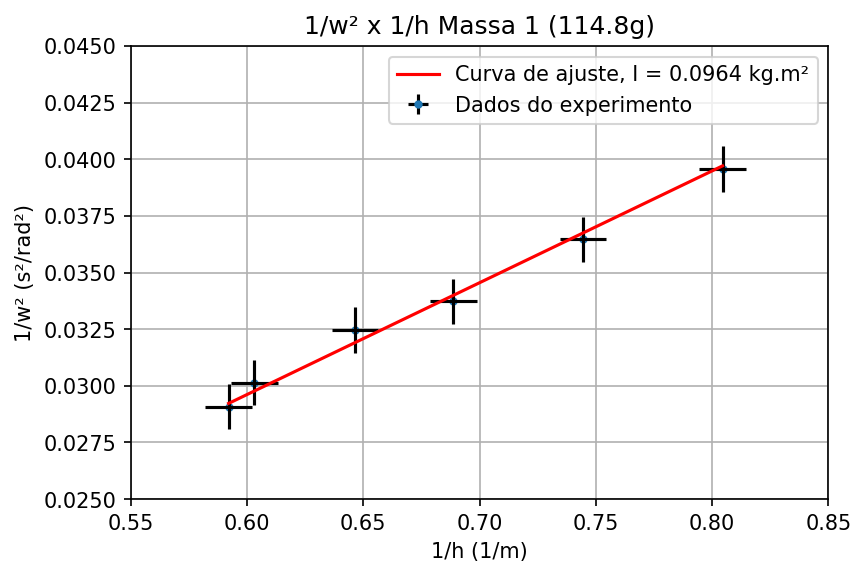

In [57]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.xlabel('1/h (1/m)')
plt.ylabel('1/w² (s²/rad²)')
plt.title('1/w² x 1/h Massa 1 (114.8g)')
plt.axis([0.55, 0.85, 0.025, .045])
plt.grid(True)

plt.errorbar(B[0], C[0], yerr=.001, xerr=0.01, fmt='.', ecolor='k', barsabove=True, label='Dados do experimento')
plt.plot(B[0], test_func(B[0], params[0]), label=f'Curva de ajuste, I = {I[0]:.4f} kg.m²', color='red')
plt.legend(loc='best')
plt.show()

In [52]:
params2, params_covariance = optimize.curve_fit(test_func, B[1], C[1])

I[1] = 2*m[1]*g*params2[0] - m[1]*r**2
print(params2, I[1])
# De acordo com a curva de ajuste, os parametros da equacao de movimento são determinados:

[0.02864428] 0.08419190882042764


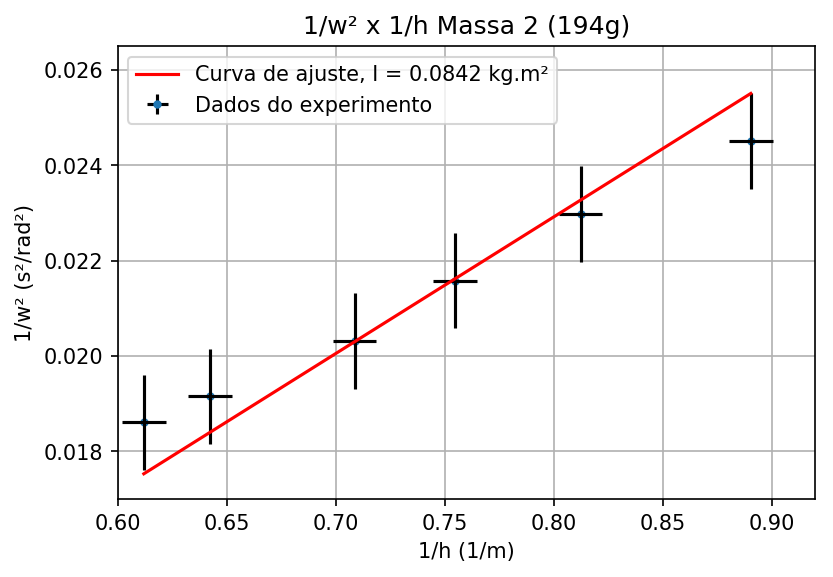

In [60]:
plt.figure(dpi=150)
plt.xlabel('1/h (1/m)')
plt.ylabel('1/w² (s²/rad²)')
plt.title('1/w² x 1/h Massa 2 (194g)')
plt.axis([0.6, 0.92, 0.017, .0265])
plt.grid(True)

plt.errorbar(B[1], C[1], yerr=.001, xerr=0.01, fmt='.', ecolor='k', barsabove=True, label='Dados do experimento')
plt.plot(B[1], test_func(B[1], params2[0]), label=f'Curva de ajuste, I = {I[1]:.4f} kg.m²', color='red')
plt.legend(loc='best')
plt.show()

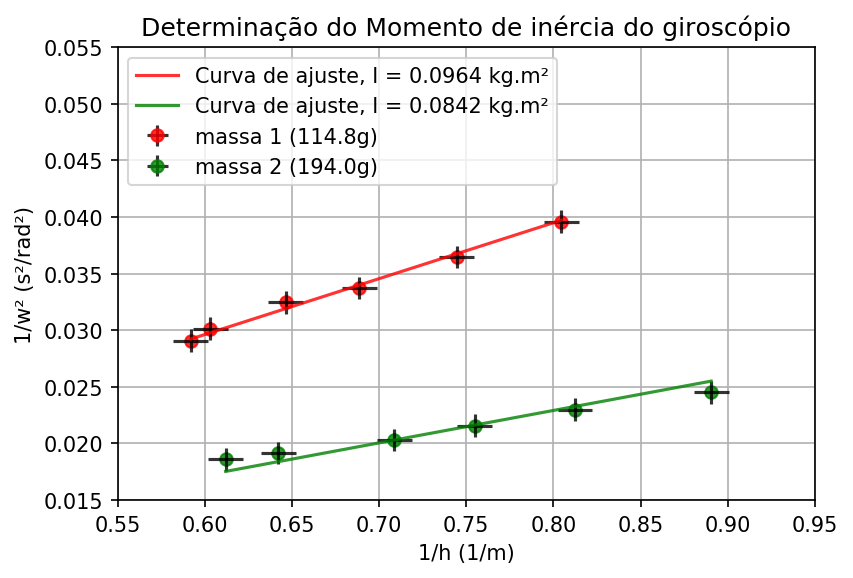

In [62]:
g1 = (B[0],C[0])
g2 = (B[1], C[1])
g3 = (B[0], test_func(B[0], params[0]))
g4 = (B[1], test_func(B[1], params2[0]))

data = (g1, g2)
data2 = (g3, g4)
colors = ("red", "green")
groups = (f"massa 1 ({m[0]*10**3:.1f}g)", f"massa 2 ({m[1]*10**3:.1f}g)")
legendas = (f'Curva de ajuste, I = {I[0]:.4f} kg.m²', f'Curva de ajuste, I = {I[1]:.4f} kg.m²')

# Create plot

fig = plt.figure(dpi=150)

ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group, legenda, data2 in zip(data, colors, groups, legendas, data2):
    x, y = data
    x2, y2 = data2
    ax.errorbar(x, y, yerr=.001, xerr=0.01, fmt='o', ecolor='k', barsabove=True, alpha=0.8, c=color, label=group)
    ax.plot(x2, y2, alpha=0.8, c=color, label=legenda)
    ax.grid(True)
    ax.legend(loc=2)
    ax.axis([0.55, .95, 0.015, .055])

plt.xlabel('1/h (1/m)')
plt.ylabel('1/w² (s²/rad²)')
plt.title('Determinação do Momento de inércia do giroscópio')
plt.show()